<h1>Markov Chain Monte Carlo Process</h1>

The following code first implements Markov Chain Monte Carlo methods. <br/>
To run the example, click on each of the following code-blocks and press the "run"-button in the menu on top of this page. <br/>
Follow the comments in each code-block to understand the commands executed in each step.

Note: Some warnings may be generated while execution. These warnings can be ignored. 

In [1]:
# Necessary imports
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D

<h2>A. Metropolis-Hastings Algorithm</h2>

A.1. Defining functions g(x) and q(x) for the target distribution 'g' and the proposal distribution 'q' respectively, both following a Normal distribution.


In [2]:
# g(x) follows a normal distribution centred at 'mu' and standard deviation 'sigma'. 
# g(x) has a proportionality constant 'k' to scale it.

def g(x, mu, sigma, k):
  return k*(1/(sigma*np.sqrt(2*np.pi)))*(np.exp((-0.5)*((x-mu)/sigma)**2))

In [3]:
# q(x) follows a normal distribution centred at 'mu' and standard deviation 'sigma'. 

def q(x, mu, sigma):
  return (1/(sigma*np.sqrt(2*np.pi)))*(np.exp((-0.5)*((x-mu)/sigma)**2))

A.2. Initializing required constants and plotting the distributions

Text(0, 0.5, 'Probability')

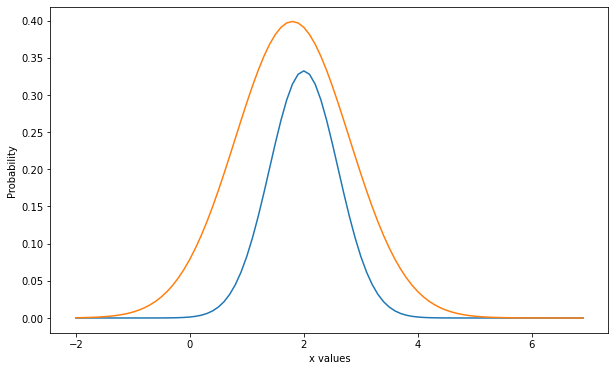

In [4]:
# Initializing mu, sigma, and the proportionality constant k for g(x)
mu_g = 2
sigma_g = 0.6
proportionality_constant_k = 0.5

# Initializing only sigma for q(x), as mu comes from the samples 
sigma_q = 1

# Initializing the first sample by choice
first_sample = 1.8
samples=[first_sample]

# Generating coordinates for g(x)
g_x_values = np.arange(-2,7,0.1)
g_y_values = [g(x, mu_g, sigma_g, proportionality_constant_k) for x in g_x_values]

# Generating coordinates for q(x)
q_x_values = np.arange(-2,7,0.1)
q_y_values = [q(x, samples[-1], sigma_q) for x in q_x_values]

# Plotting the distributions
plt.figure(figsize=(10,6))
plt.plot(g_x_values, g_y_values)
plt.plot(q_x_values, q_y_values)
plt.xlabel('x values')
plt.ylabel('Probability')

A.3. Performing the Metropolis-Hastings algorithm

In [5]:
# Initializing the number of iterations to be performed
number_of_iterations = 1000000
number_of_candidates_accepted = 0

for i in range(number_of_iterations):
  previous_sample = samples[-1]

  # Generating a random normal candidate point from q(x)
  candidate_x_star = np.random.normal(previous_sample, sigma_q)

  # Calculating the probability of acceptance
  alpha = (g(candidate_x_star, mu_g, sigma_g, proportionality_constant_k)/q(candidate_x_star, previous_sample, sigma_q))/(g(previous_sample, mu_g, sigma_g, proportionality_constant_k)/q(previous_sample, candidate_x_star, sigma_q))
  probability = min(alpha, 1)

  # Acceptance with calculated probability and adding the candidate point to the samples
  if np.random.random()<probability:
      samples.append(candidate_x_star)
      number_of_candidates_accepted += 1
      
  # Rejection of the candidate and adding the previous point to the samples
  else:
      samples.append(samples[-1])

In [6]:
# Retaining the samples after burn in
burn_in = 1000
samples_after_burn_in = samples[burn_in+1:]
print("Number of relevant samples:", len(samples_after_burn_in))
print("Number of samples accepted: ", number_of_candidates_accepted)
print("Percentage of acceptance: ", (number_of_candidates_accepted / number_of_iterations))

Number of relevant samples: 999000
Number of samples accepted:  557965
Percentage of acceptance:  0.557965


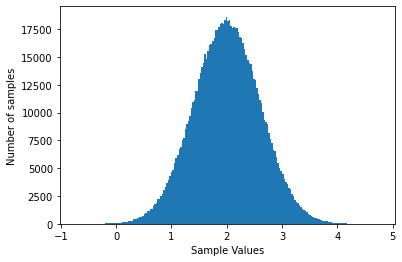

In [7]:
# Plotting the histogram of the drawn samples show that they are drawn from the target distribution
plt.hist(samples_after_burn_in, bins=200)
plt.xlabel('Sample Values')
plt.ylabel('Number of samples')
plt.show()

<h2> B. Gibbs Sampling </h2>

Here, we make use of a bivariate normal distribution centred at (0,0) with variance of both X and Y as 1, and the covariance ρ = 0.5. 

For a bivariate normal distribution, the conditional probabilities P(X|Y) and P(Y|X) are given by the following equations:

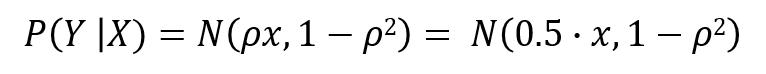   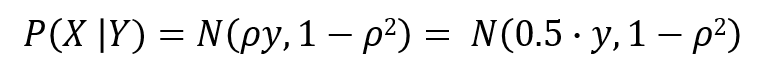

B.1. Initializing the parameters of the required bivariate normal distribution and visualizing it

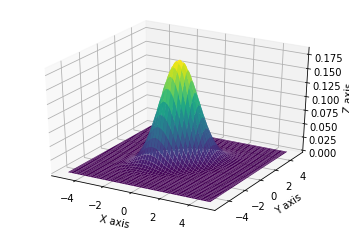

In [8]:
# Initializing the parameters for both the variables
mu_x = 0
variance_x = 1

mu_y = 0
variance_y = 1

# Covariance rho
rho = 0.5

# Creating grid for 3D visualization 
x = np.linspace(-5,5,100)
y = np.linspace(-5,5,100)
X, Y = np.meshgrid(x,y)
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X; pos[:, :, 1] = Y

# Defining our bivariate normal distribution
f = multivariate_normal([mu_x, mu_y], [[variance_x, rho], [rho, variance_y]])

#Make a 3D plot
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, f.pdf(pos),cmap='viridis',linewidth=0)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.show()

B.2. Performing the Gibbs Sampling algorithm

In [9]:
# Initializing the first random sample point

gibbs_samples = {'x': [0.5], 'y': [0]}
number_of_samples = 10000

In [10]:
# Peforming the Gibbs Sampling algorithm

for i in range(number_of_samples):
    old_y = gibbs_samples['y'][-1]

    # Generating the next x using previous value of y
    new_x = np.random.normal(rho*old_y, np.sqrt(1-rho**2))

    # Generating the next y using new value of x
    new_y = np.random.normal(new_x/2, np.sqrt(1-rho**2))

    # Adding the sample to the sample set
    gibbs_samples['x'].append(new_x)
    gibbs_samples['y'].append(new_y)

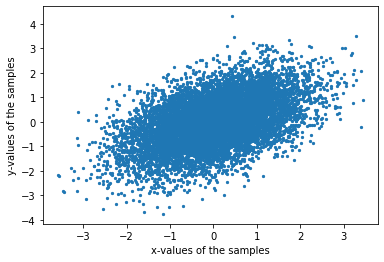

In [11]:
# Scatter plot to visualize the sample points
plt.xlabel('x-values of the samples')
plt.ylabel('y-values of the samples')
plt.scatter(gibbs_samples['x'], gibbs_samples['y'], s=5)